   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Saving data_hl19.csv to data_hl19.csv
✅ Upload thành công: data_hl19.csv

🎯 TÙY CHỌN CHƯƠNG TRÌNH
📊 Bạn có muốn plot đồ thị kết quả anomaly detection không? (y/n): y
📈 Bạn có muốn plot đồ thị loss theo thời gian training không? (y/n): y
💾 Bạn có muốn lưu trained model không? (y/n): y
📉 Bạn có muốn lưu biểu đồ training loss không? (y/n): y
📋 Bạn có muốn lưu kết quả ra file Excel không? (y/n): y

✅ TÓM TẮT LỰA CHỌN:
📊 Plot anomaly results: Có
📈 Plot training loss: Có
💾 Save model: Có
📉 Save loss plot: Có
📋 Save Excel: Có

📖 LOADING DATA...
📖 Đang đọc file: data_hl19.csv
✅ Đọc thành công! Shape: (15975, 20)
📋 Columns: ['date', 'BEARER_MME_UTIL', 'CREATE_DEDICATED_BEARER_SR', 'CSFB SR', 'DEDICATED_BEARER_MME', 'EASR', 'INTRA_TAU_SR', 'S1_INTRA_HANDOVER_SR', 'S1_PAGGING_SR', 'SAU_4G', 'SAU_UTIL_4G', 'SERVICE_REQUEST_SR', 'SG_LU_SR', 'SMS_PAGGING_SR', 'BEARER_4G', 'PGW BEARER SR', 'PGW_BEARER_UTIL', 'SGW BEARER SR', 'THROUGHPUT_4G', 'THROUGHPUT_UTIL']
📅 Date range: 2025-02-01 00:00:00 to 202

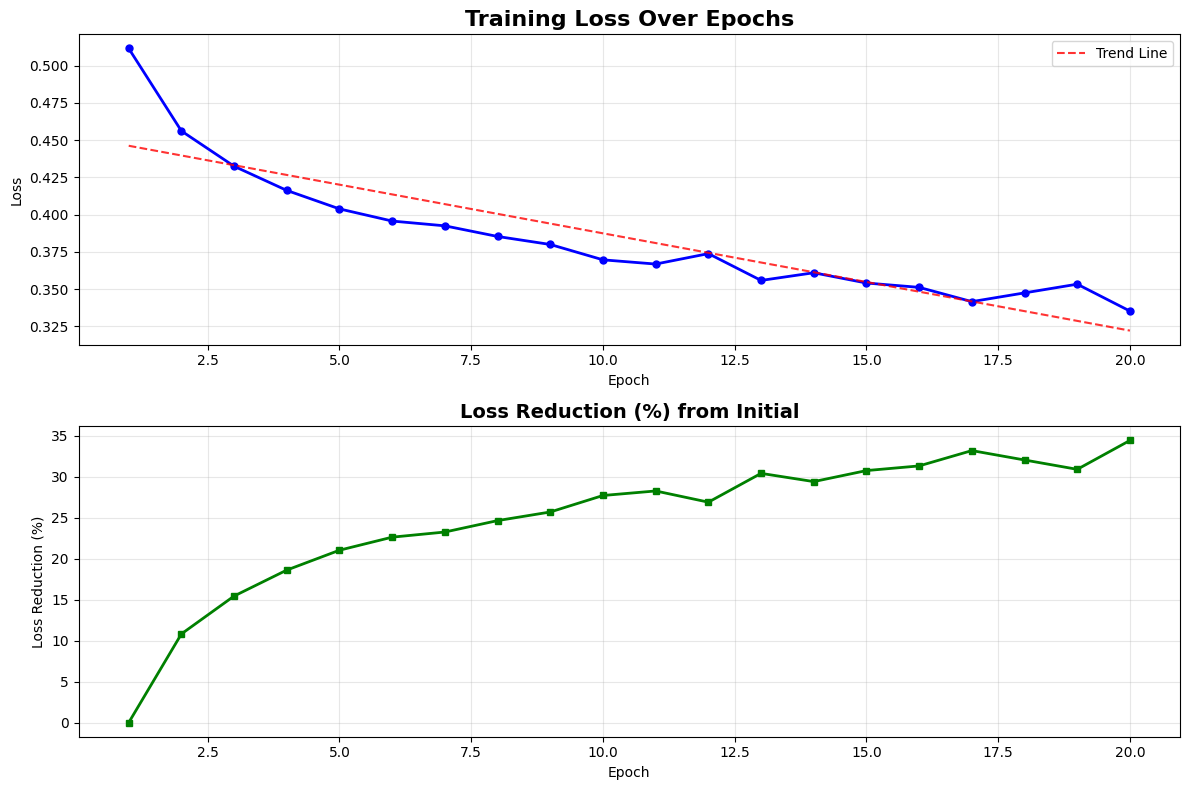


📊 TRAINING STATISTICS:
📉 Initial Loss: 0.511453
📈 Final Loss: 0.335298
🔻 Loss Reduction: 34.44%
📊 Best Loss: 0.335298 (Epoch 20)
📈 Recent 5 epochs avg: 0.345795
📉 Early 5 epochs avg: 0.444003
🎯 Convergence rate: 22.12%
📊 Plotting anomaly results...


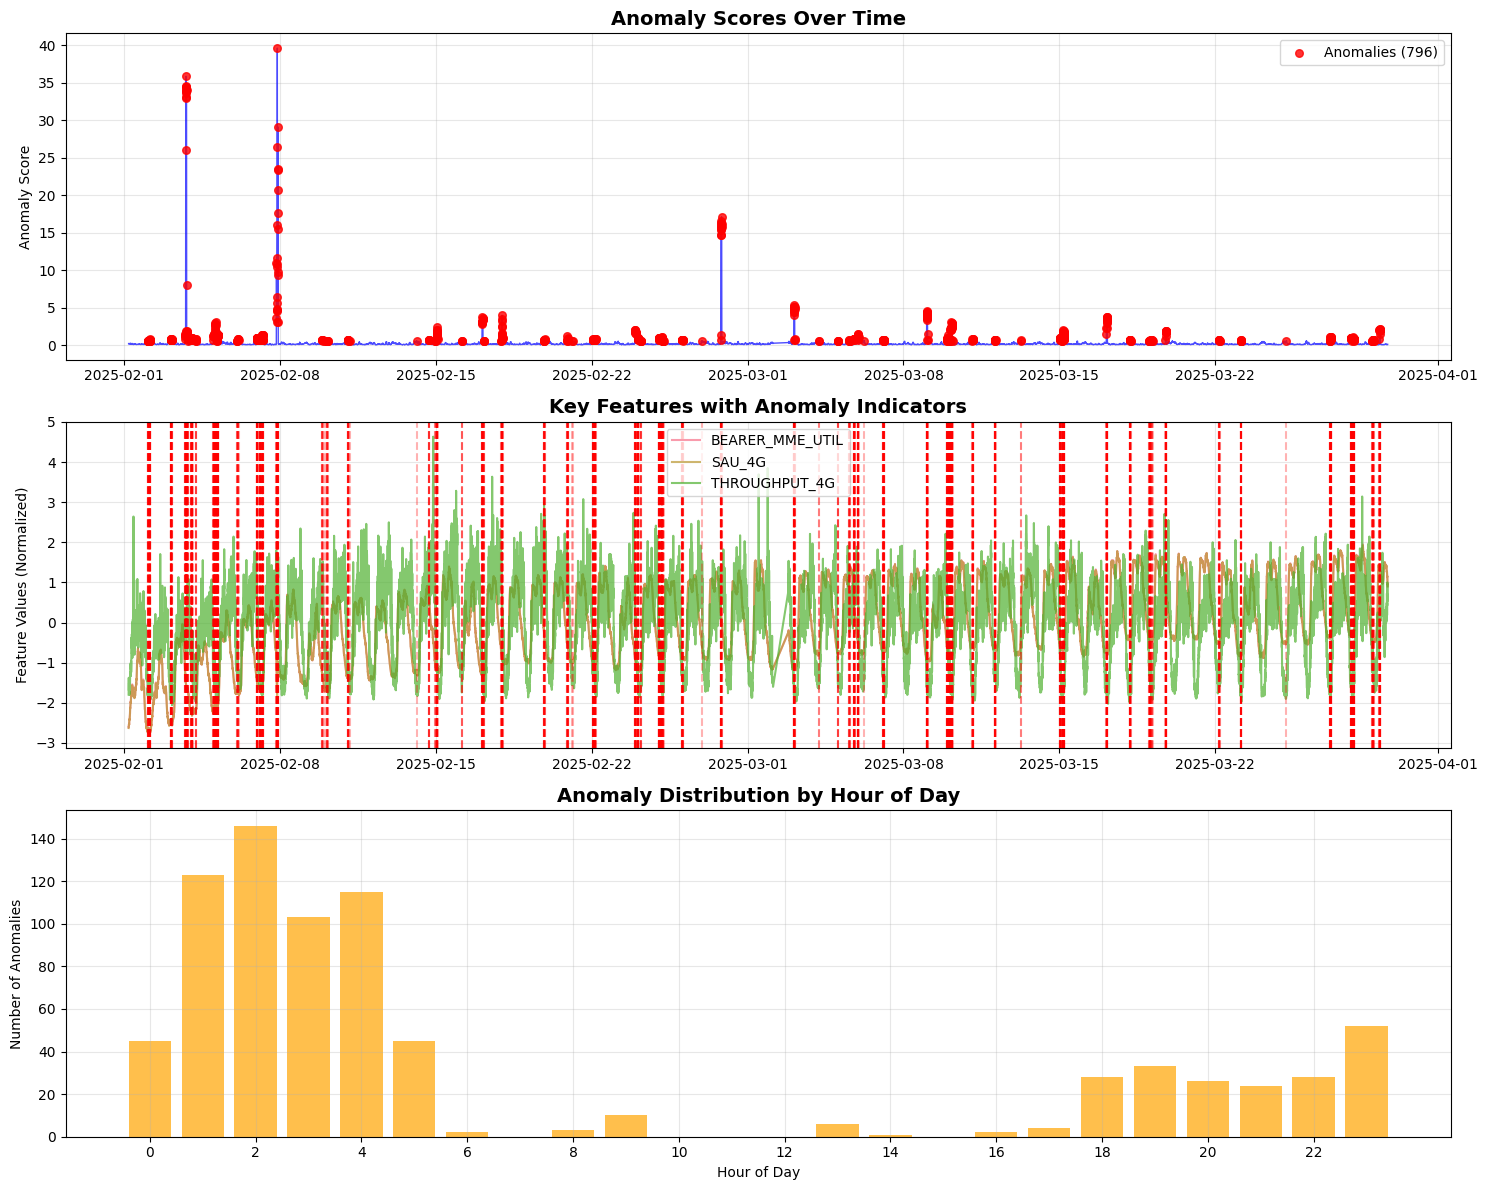

💾 Saving results to Excel...
✅ Results saved to telecom_anomaly_results.xlsx
📊 Total records: 15,916
🚨 Anomalies detected: 796
📈 Anomaly rate: 5.00%
💾 Saving trained model...
💾 Model saved successfully to informer_telecom_anomaly_model.pth

🎉 HOÀN THÀNH! Tất cả tasks đã được thực hiện theo yêu cầu.


In [1]:
# Interactive Informer Model for Anomaly Detection - Telecom Network Data
# Phiên bản tương tác với user input

# Bước 1: Cài đặt các thư viện cần thiết
!pip install torch torchvision torchaudio
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install plotly openpyxl

# Clone Informer repository từ GitHub
!git clone https://github.com/zhouhaoyi/Informer2020.git
import sys
sys.path.append('/content/Informer2020')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import pickle

# Set style cho plots
plt.style.use('default')
sns.set_palette("husl")

# Bước 2: Upload dataset function
def upload_dataset():
    """
    Yêu cầu người dùng upload dataset
    """
    print("📁 UPLOAD DATASET")
    print("="*50)
    print("Vui lòng upload file CSV chứa dữ liệu telecom của bạn.")
    print("File cần có cột 'date' và các metrics khác.")
    print("Ví dụ: data_hl19.csv")
    print("\nClick vào nút 'Choose Files' bên dưới để upload:")

    uploaded = files.upload()

    if not uploaded:
        print("❌ Không có file nào được upload!")
        return None

    filename = list(uploaded.keys())[0]
    print(f"✅ Upload thành công: {filename}")

    # Kiểm tra file format
    if not filename.endswith('.csv'):
        print("⚠️ Cảnh báo: File không phải định dạng CSV. Có thể gây lỗi.")

    return filename

def get_user_preferences():
    """
    Hỏi ý kiến người dùng về các options
    """
    print("\n🎯 TÙY CHỌN CHƯƠNG TRÌNH")
    print("="*50)

    preferences = {}

    # Hỏi về plotting results
    while True:
        plot_results = input("📊 Bạn có muốn plot đồ thị kết quả anomaly detection không? (y/n): ").lower().strip()
        if plot_results in ['y', 'yes', 'n', 'no']:
            preferences['plot_results'] = plot_results in ['y', 'yes']
            break
        print("❌ Vui lòng nhập 'y' hoặc 'n'")

    # Hỏi về plotting loss
    while True:
        plot_loss = input("📈 Bạn có muốn plot đồ thị loss theo thời gian training không? (y/n): ").lower().strip()
        if plot_loss in ['y', 'yes', 'n', 'no']:
            preferences['plot_loss'] = plot_loss in ['y', 'yes']
            break
        print("❌ Vui lòng nhập 'y' hoặc 'n'")

    # Hỏi về save model
    while True:
        save_model = input("💾 Bạn có muốn lưu trained model không? (y/n): ").lower().strip()
        if save_model in ['y', 'yes', 'n', 'no']:
            preferences['save_model'] = save_model in ['y', 'yes']
            break
        print("❌ Vui lòng nhập 'y' hoặc 'n'")

    # Hỏi về save loss plot
    while True:
        save_loss_plot = input("📉 Bạn có muốn lưu biểu đồ training loss không? (y/n): ").lower().strip()
        if save_loss_plot in ['y', 'yes', 'n', 'no']:
            preferences['save_loss_plot'] = save_loss_plot in ['y', 'yes']
            break
        print("❌ Vui lòng nhập 'y' hoặc 'n'")

    # Hỏi về save results to Excel
    while True:
        save_excel = input("📋 Bạn có muốn lưu kết quả ra file Excel không? (y/n): ").lower().strip()
        if save_excel in ['y', 'yes', 'n', 'no']:
            preferences['save_excel'] = save_excel in ['y', 'yes']
            break
        print("❌ Vui lòng nhập 'y' hoặc 'n'")

    # Hiển thị tóm tắt lựa chọn
    print("\n✅ TÓM TẮT LỰA CHỌN:")
    print(f"📊 Plot anomaly results: {'Có' if preferences['plot_results'] else 'Không'}")
    print(f"📈 Plot training loss: {'Có' if preferences['plot_loss'] else 'Không'}")
    print(f"💾 Save model: {'Có' if preferences['save_model'] else 'Không'}")
    print(f"📉 Save loss plot: {'Có' if preferences['save_loss_plot'] else 'Không'}")
    print(f"📋 Save Excel: {'Có' if preferences['save_excel'] else 'Không'}")

    return preferences

# Bước 3: Chuẩn bị dữ liệu (giữ nguyên class TelecomDataset)
class TelecomDataset(Dataset):
    def __init__(self, data, seq_len=96, label_len=48, pred_len=24, features='M'):
        """
        Args:
            data: pandas DataFrame với cột 'date' và các features
            seq_len: độ dài sequence đầu vào
            label_len: độ dài label sequence
            pred_len: độ dài prediction
            features: 'M' (multivariate), 'S' (univariate), 'MS' (multivariate predict univariate)
        """
        self.seq_len = seq_len
        self.label_len = label_len
        self.pred_len = pred_len
        self.features = features

        # Chuẩn bị dữ liệu
        self.data_stamp = self._get_time_features(data)

        # Chuẩn hóa dữ liệu
        self.scaler = StandardScaler()
        data_values = data.drop('date', axis=1).values
        self.data = self.scaler.fit_transform(data_values)

        # Tính toán border indices
        num_train = int(len(self.data) * 0.7)
        num_test = int(len(self.data) * 0.2)
        num_vali = len(self.data) - num_train - num_test

        border1s = [0, num_train - self.seq_len, len(self.data) - num_test - self.seq_len]
        border2s = [num_train, num_train + num_vali, len(self.data)]

        self.border1 = border1s[0]  # train
        self.border2 = border2s[0]

    def _get_time_features(self, df):
        """Tạo time features từ cột date với định dạng phù hợp cho freq='t' (minutely)"""
        df_stamp = df[['date']].copy()
        df_stamp['date'] = pd.to_datetime(df_stamp.date)

        # Với freq='t' (minutely), cần 5 features: [month, day, weekday, hour, minute]
        df_stamp['month'] = df_stamp.date.apply(lambda row: row.month, 1)
        df_stamp['day'] = df_stamp.date.apply(lambda row: row.day, 1)
        df_stamp['weekday'] = df_stamp.date.apply(lambda row: row.weekday(), 1)
        df_stamp['hour'] = df_stamp.date.apply(lambda row: row.hour, 1)
        df_stamp['minute'] = df_stamp.date.apply(lambda row: row.minute, 1)

        # Normalize các features về [0,1]
        data_stamp = df_stamp.drop(['date'], axis=1).values.astype(float)
        data_stamp[:, 0] = (data_stamp[:, 0] - 1) / 11  # month: 1-12 -> 0-1
        data_stamp[:, 1] = (data_stamp[:, 1] - 1) / 30  # day: 1-31 -> 0-1
        data_stamp[:, 2] = data_stamp[:, 2] / 6         # weekday: 0-6 -> 0-1
        data_stamp[:, 3] = data_stamp[:, 3] / 23        # hour: 0-23 -> 0-1
        data_stamp[:, 4] = data_stamp[:, 4] / 59        # minute: 0-59 -> 0-1

        return data_stamp

    def __getitem__(self, index):
        s_begin = index
        s_end = s_begin + self.seq_len
        r_begin = s_end - self.label_len
        r_end = r_begin + self.label_len + self.pred_len

        seq_x = self.data[s_begin:s_end]
        seq_y = self.data[r_begin:r_end]
        seq_x_mark = self.data_stamp[s_begin:s_end]
        seq_y_mark = self.data_stamp[r_begin:r_end]

        return seq_x, seq_y, seq_x_mark, seq_y_mark

    def __len__(self):
        return max(0, len(self.data) - self.seq_len - self.pred_len + 1)

# Bước 4: Load dữ liệu với validation
def load_telecom_data(filename):
    """
    Load và validate dữ liệu telecom
    """
    try:
        print(f"📖 Đang đọc file: {filename}")
        df = pd.read_csv(filename)

        # Làm sạch tên cột
        df.columns = df.columns.str.strip()

        print(f"✅ Đọc thành công! Shape: {df.shape}")
        print(f"📋 Columns: {df.columns.tolist()}")

        # Kiểm tra cột date
        if 'date' not in df.columns:
            print("❌ Lỗi: Không tìm thấy cột 'date' trong file!")
            return None

        # Parse date column
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date').reset_index(drop=True)

        print(f"📅 Date range: {df['date'].min()} to {df['date'].max()}")
        print(f"📊 Total records: {len(df):,}")

        # Kiểm tra missing values
        missing_counts = df.isnull().sum()
        if missing_counts.sum() > 0:
            print("⚠️ Cảnh báo: Có missing values:")
            print(missing_counts[missing_counts > 0])

            # Xử lý missing values
            df = df.fillna(method='ffill').fillna(method='bfill')
            print("🔧 Đã xử lý missing values bằng forward/backward fill")

        return df

    except Exception as e:
        print(f"❌ Lỗi khi đọc file: {e}")
        return None

# Bước 5: Informer model với tracking losses
from models.model import Informer

class InformerAnomalyDetector:
    def __init__(self, enc_in, dec_in, c_out, seq_len=96, label_len=48, out_len=24,
                 factor=5, d_model=256, n_heads=4, e_layers=2, d_layers=1, d_ff=256,
                 dropout=0.1, attn='prob', embed='timeF', activation='gelu',
                 output_attention=False, distil=True, mix=True, device='cuda'):

        self.device = device if torch.cuda.is_available() else 'cpu'
        print(f"🔧 Using device: {self.device}")

        self.model = Informer(
            enc_in=enc_in,
            dec_in=dec_in,
            c_out=c_out,
            seq_len=seq_len,
            label_len=label_len,
            out_len=out_len,
            factor=factor,
            d_model=d_model,
            n_heads=n_heads,
            e_layers=e_layers,
            d_layers=d_layers,
            d_ff=d_ff,
            dropout=dropout,
            attn=attn,
            embed=embed,
            freq='t',
            activation=activation,
            output_attention=output_attention,
            distil=distil,
            mix=mix
        ).to(self.device)

        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=0.0001)

    def train(self, train_loader, epochs=10):
        """Training loop với tracking losses"""
        self.model.train()
        train_losses = []

        print(f"🚀 Bắt đầu training với {epochs} epochs...")

        for epoch in range(epochs):
            epoch_loss = 0
            batch_count = 0

            for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(train_loader):
                batch_x = batch_x.float().to(self.device)
                batch_y = batch_y.float().to(self.device)
                batch_x_mark = batch_x_mark.float().to(self.device)
                batch_y_mark = batch_y_mark.float().to(self.device)

                # decoder input
                dec_inp = torch.zeros_like(batch_y[:, -12:, :]).float()
                dec_inp = torch.cat([batch_y[:, :24, :], dec_inp], dim=1).float().to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

                loss = self.criterion(outputs, batch_y[:, -12:, :])
                loss.backward()
                self.optimizer.step()

                epoch_loss += loss.item()
                batch_count += 1

                # Progress update mỗi 50 batches
                if (i + 1) % 50 == 0:
                    print(f"  Epoch {epoch+1}/{epochs}, Batch {i+1}/{len(train_loader)}, Current Loss: {loss.item():.6f}")

            avg_loss = epoch_loss / batch_count if batch_count > 0 else 0
            train_losses.append(avg_loss)
            print(f"✅ Epoch {epoch+1}/{epochs} completed, Average Loss: {avg_loss:.6f}")

        print("🎉 Training hoàn thành!")
        return train_losses

    def predict(self, test_loader):
        """Prediction và tính anomaly score"""
        print("🔮 Đang generate predictions...")
        self.model.eval()
        predictions = []
        actuals = []
        anomaly_scores = []

        with torch.no_grad():
            for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(test_loader):
                batch_x = batch_x.float().to(self.device)
                batch_y = batch_y.float().to(self.device)
                batch_x_mark = batch_x_mark.float().to(self.device)
                batch_y_mark = batch_y_mark.float().to(self.device)

                dec_inp = torch.zeros_like(batch_y[:, -12:, :]).float()
                dec_inp = torch.cat([batch_y[:, :24, :], dec_inp], dim=1).float().to(self.device)

                outputs = self.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

                pred = outputs.cpu().numpy()
                true = batch_y[:, -12:, :].cpu().numpy()

                predictions.append(pred)
                actuals.append(true)

                # Tính anomaly score dựa trên MSE
                mse = np.mean((pred - true) ** 2, axis=(1, 2))
                anomaly_scores.extend(mse)

                if (i + 1) % 50 == 0:
                    print(f"  Processed {i+1}/{len(test_loader)} batches")

        print("✅ Prediction hoàn thành!")
        return np.concatenate(predictions), np.concatenate(actuals), np.array(anomaly_scores)

    def save_model(self, filepath='informer_anomaly_model.pth'):
        """Save trained model"""
        try:
            torch.save({
                'model_state_dict': self.model.state_dict(),
                'optimizer_state_dict': self.optimizer.state_dict(),
            }, filepath)
            print(f"💾 Model saved successfully to {filepath}")
        except Exception as e:
            print(f"❌ Error saving model: {e}")

# Bước 6: Visualization functions
def plot_training_loss(train_losses, save_plot=False, filename='training_loss.png'):
    """Plot training loss theo epochs với option save"""
    plt.figure(figsize=(12, 8))

    # Main loss plot
    plt.subplot(2, 1, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, 'b-', marker='o', linewidth=2, markersize=5)
    plt.title('Training Loss Over Epochs', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, alpha=0.3)

    # Add trend line
    z = np.polyfit(range(1, len(train_losses) + 1), train_losses, 1)
    p = np.poly1d(z)
    plt.plot(range(1, len(train_losses) + 1), p(range(1, len(train_losses) + 1)), "r--", alpha=0.8, label='Trend Line')
    plt.legend()

    # Loss reduction plot
    plt.subplot(2, 1, 2)
    loss_reduction = [(train_losses[0] - loss) / train_losses[0] * 100 for loss in train_losses]
    plt.plot(range(1, len(loss_reduction) + 1), loss_reduction, 'g-', marker='s', linewidth=2, markersize=4)
    plt.title('Loss Reduction (%) from Initial', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Reduction (%)')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()

    # Save plot if requested
    if save_plot:
        try:
            plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
            print(f"📉 Training loss plot saved to {filename}")
        except Exception as e:
            print(f"❌ Error saving loss plot: {e}")

    plt.show()

    # Print statistics
    print(f"\n📊 TRAINING STATISTICS:")
    print(f"📉 Initial Loss: {train_losses[0]:.6f}")
    print(f"📈 Final Loss: {train_losses[-1]:.6f}")
    print(f"🔻 Loss Reduction: {((train_losses[0] - train_losses[-1]) / train_losses[0] * 100):.2f}%")
    print(f"📊 Best Loss: {min(train_losses):.6f} (Epoch {train_losses.index(min(train_losses)) + 1})")

    if len(train_losses) > 5:
        recent_avg = np.mean(train_losses[-5:])
        early_avg = np.mean(train_losses[:5])
        print(f"📈 Recent 5 epochs avg: {recent_avg:.6f}")
        print(f"📉 Early 5 epochs avg: {early_avg:.6f}")
        print(f"🎯 Convergence rate: {((early_avg - recent_avg) / early_avg * 100):.2f}%")

def plot_anomaly_results(data, anomaly_scores, anomalies, feature_names, df, save_plot=False, filename='anomaly_results.png'):
    """
    Enhanced visualization cho anomaly results với option save
    """
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))

    # Tạo time index cho plotting
    n_scores = len(anomaly_scores)
    if len(df) >= n_scores:
        time_index = df.iloc[-n_scores:]['date'].reset_index(drop=True)
    else:
        time_index = pd.date_range(start='2025-01-01', periods=n_scores, freq='5min')

    # Plot 1: Anomaly scores
    axes[0].plot(time_index, anomaly_scores, color='blue', alpha=0.7, linewidth=1)
    anomaly_indices = np.where(anomalies)[0]
    if len(anomaly_indices) > 0:
        axes[0].scatter(time_index.iloc[anomaly_indices], anomaly_scores[anomalies],
                       color='red', s=30, alpha=0.8, label=f'Anomalies ({len(anomaly_indices)})', zorder=5)
    axes[0].set_title('Anomaly Scores Over Time', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Anomaly Score')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Plot 2: Feature data với anomaly indicators
    important_features = ['BEARER_MME_UTIL', 'SAU_4G', 'THROUGHPUT_4G']
    for feature in important_features[:3]:
        if feature in feature_names:
            feature_idx = feature_names.index(feature)
            # Lấy data tương ứng với time range
            feature_data = data[-n_scores:, feature_idx] if len(data) >= n_scores else data[:, feature_idx]
            axes[1].plot(time_index, feature_data, label=feature, alpha=0.7)

    # Highlight anomaly points
    for i in anomaly_indices:
        if i < len(time_index):
            axes[1].axvline(x=time_index.iloc[i], color='red', alpha=0.3, linestyle='--')

    axes[1].set_title('Key Features with Anomaly Indicators', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Feature Values (Normalized)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # Plot 3: Anomaly distribution by hour
    if len(anomaly_indices) > 0:
        anomaly_times = time_index.iloc[anomaly_indices]
        if hasattr(anomaly_times.iloc[0], 'hour'):
            anomaly_hours = anomaly_times.dt.hour.value_counts().sort_index()
            axes[2].bar(anomaly_hours.index, anomaly_hours.values, color='orange', alpha=0.7)
            axes[2].set_title('Anomaly Distribution by Hour of Day', fontsize=14, fontweight='bold')
            axes[2].set_xlabel('Hour of Day')
            axes[2].set_ylabel('Number of Anomalies')
            axes[2].set_xticks(range(0, 24, 2))
            axes[2].grid(True, alpha=0.3)
    else:
        axes[2].text(0.5, 0.5, 'No anomalies detected', transform=axes[2].transAxes,
                    ha='center', va='center', fontsize=12)
        axes[2].set_title('Anomaly Distribution by Hour of Day', fontsize=14, fontweight='bold')

    plt.tight_layout()

    # Save plot if requested
    if save_plot:
        try:
            plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
            print(f"📊 Anomaly results plot saved to {filename}")
        except Exception as e:
            print(f"❌ Error saving anomaly plot: {e}")

    plt.show()

def save_results_to_excel(results, df, output_file='telecom_anomaly_results.xlsx'):
    """
    Save results to Excel with multiple sheets
    """
    try:
        n_results = len(results['anomaly_scores'])

        # Tạo time index
        if len(df) >= n_results:
            start_idx = len(df) - n_results
            time_data = df.iloc[start_idx:start_idx + n_results]['date'].reset_index(drop=True)
        else:
            time_data = pd.date_range(start='2025-01-01', periods=n_results, freq='5min')

        # Main results
        results_df = pd.DataFrame({
            'timestamp': time_data,
            'anomaly_score': results['anomaly_scores'],
            'is_anomaly': results['anomalies'].astype(bool),
            'threshold_used': results['threshold']
        })

        # Anomaly ranking
        results_df['anomaly_rank'] = results_df['anomaly_score'].rank(ascending=False)

        # Save to Excel
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            # Sheet 1: Main results
            results_df.to_excel(writer, sheet_name='Anomaly_Results', index=False)

            # Sheet 2: Summary statistics
            total_anomalies = results_df['is_anomaly'].sum()
            summary_stats = pd.DataFrame({
                'Metric': ['Total Records', 'Total Anomalies', 'Anomaly Rate (%)',
                          'Avg Anomaly Score', 'Max Anomaly Score', 'Threshold'],
                'Value': [
                    len(results_df),
                    total_anomalies,
                    (total_anomalies / len(results_df)) * 100,
                    results_df[results_df['is_anomaly']]['anomaly_score'].mean() if total_anomalies > 0 else 0,
                    results_df['anomaly_score'].max(),
                    results['threshold']
                ]
            })
            summary_stats.to_excel(writer, sheet_name='Summary', index=False)

            # Sheet 3: Top anomalies
            if total_anomalies > 0:
                top_anomalies = results_df[results_df['is_anomaly']].nlargest(20, 'anomaly_score')
                top_anomalies.to_excel(writer, sheet_name='Top_Anomalies', index=False)

        print(f"✅ Results saved to {output_file}")
        print(f"📊 Total records: {len(results_df):,}")
        print(f"🚨 Anomalies detected: {total_anomalies:,}")
        print(f"📈 Anomaly rate: {(total_anomalies / len(results_df)) * 100:.2f}%")

        return results_df

    except Exception as e:
        print(f"❌ Error saving results: {e}")
        return None

# Bước 7: Main function với user interaction
def detect_anomalies(anomaly_scores, threshold_percentile=95):
    """Phát hiện bất thường dựa trên threshold"""
    threshold = np.percentile(anomaly_scores, threshold_percentile)
    anomalies = anomaly_scores > threshold
    return anomalies, threshold

def main():
    """
    Hàm chính với user interaction
    """
    print("🎯 INFORMER ANOMALY DETECTION FOR TELECOM DATA")
    print("="*60)

    # Step 1: Upload dataset
    filename = upload_dataset()
    if filename is None:
        return None

    # Step 2: Get user preferences
    preferences = get_user_preferences()

    # Step 3: Load and validate data
    print(f"\n📖 LOADING DATA...")
    df = load_telecom_data(filename)
    if df is None:
        return None

    # Step 4: Create dataset
    print(f"\n🔧 PREPARING DATASET...")
    dataset = TelecomDataset(df, seq_len=48, label_len=24, pred_len=12)

    dataset_size = len(dataset)
    if dataset_size == 0:
        print(f"❌ Dataset is empty. Need at least {48 + 12} samples.")
        return None

    print(f"✅ Dataset size: {dataset_size:,} samples")

    # Create data loaders
    batch_size = 16
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Step 5: Initialize model
    print(f"\n🤖 INITIALIZING MODEL...")
    feature_count = len(df.columns) - 1
    print(f"Features: {feature_count}")

    detector = InformerAnomalyDetector(
        enc_in=feature_count,
        dec_in=feature_count,
        c_out=feature_count,
        seq_len=48,
        label_len=24,
        out_len=12
    )

    # Step 6: Training
    print(f"\n🚀 TRAINING MODEL...")
    train_losses = detector.train(train_loader, epochs=20)

    # Step 7: Prediction
    print(f"\n🔮 GENERATING PREDICTIONS...")
    predictions, actuals, anomaly_scores = detector.predict(test_loader)

    # Step 8: Detect anomalies
    print(f"\n🕵️ DETECTING ANOMALIES...")
    anomalies, threshold = detect_anomalies(anomaly_scores, threshold_percentile=95)

    print(f"✅ Detected {np.sum(anomalies):,} anomalies out of {len(anomaly_scores):,} samples")
    print(f"📊 Anomaly rate: {(np.sum(anomalies) / len(anomaly_scores)) * 100:.2f}%")
    print(f"🎯 Threshold: {threshold:.6f}")

    # Prepare results
    results = {
        'anomaly_scores': anomaly_scores,
        'anomalies': anomalies,
        'threshold': threshold,
        'predictions': predictions,
        'actuals': actuals,
        'train_losses': train_losses
    }

    # Step 9: Execute user preferences
    print(f"\n📊 EXECUTING USER PREFERENCES...")

    # Plot training loss
    if preferences['plot_loss']:
        print("📈 Plotting training loss...")
        plot_training_loss(train_losses, save_plot=preferences['save_loss_plot'], filename='training_loss.png')
    elif preferences['save_loss_plot']:
        print("📉 Saving training loss plot...")
        plot_training_loss(train_losses, save_plot=True, filename='training_loss.png')

    # Plot anomaly results
    if preferences['plot_results']:
        print("📊 Plotting anomaly results...")
        feature_names = [col for col in df.columns if col != 'date']
        plot_anomaly_results(dataset.data, anomaly_scores, anomalies, feature_names, df,
                           save_plot=False, filename='anomaly_results.png')

    # Save loss plot only (nếu user chỉ muốn save mà không plot)
    if preferences['save_loss_plot'] and not preferences['plot_loss']:
        print("📉 Saving training loss plot only...")
        # Create loss plot without showing
        plt.figure(figsize=(12, 8))
        plt.subplot(2, 1, 1)
        plt.plot(range(1, len(train_losses) + 1), train_losses, 'b-', marker='o', linewidth=2, markersize=5)
        plt.title('Training Loss Over Epochs', fontsize=16, fontweight='bold')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.grid(True, alpha=0.3)

        z = np.polyfit(range(1, len(train_losses) + 1), train_losses, 1)
        p = np.poly1d(z)
        plt.plot(range(1, len(train_losses) + 1), p(range(1, len(train_losses) + 1)), "r--", alpha=0.8, label='Trend Line')
        plt.legend()

        plt.subplot(2, 1, 2)
        loss_reduction = [(train_losses[0] - loss) / train_losses[0] * 100 for loss in train_losses]
        plt.plot(range(1, len(loss_reduction) + 1), loss_reduction, 'g-', marker='s', linewidth=2, markersize=4)
        plt.title('Loss Reduction (%) from Initial', fontsize=14, fontweight='bold')
        plt.xlabel('Epoch')
        plt.ylabel('Loss Reduction (%)')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('training_loss.png', dpi=300, bbox_inches='tight', facecolor='white')
        plt.close()  # Close without showing
        print("📉 Training loss plot saved to training_loss.png")

    # Save to Excel
    if preferences['save_excel']:
        print("💾 Saving results to Excel...")
        results_df = save_results_to_excel(results, df)

    # Save model
    if preferences['save_model']:
        print("💾 Saving trained model...")
        detector.save_model('informer_telecom_anomaly_model.pth')

    print(f"\n🎉 HOÀN THÀNH! Tất cả tasks đã được thực hiện theo yêu cầu.")

    return results

# Chạy chương trình chính
if __name__ == "__main__":
    results = main()

🎨 ANOMALY DETECTION VISUALIZATION

🎨 TÙY CHỌN VISUALIZATION
📊 Bạn có muốn hiển thị các biểu đồ không? (y/n): y
💾 Bạn có muốn lưu các biểu đồ ra file ảnh không? (y/n): y
🔮 Bạn có muốn plot đồ thị dự đoán (predictions) không? (y/n): y
📈 Bạn có muốn phân tích chi tiết (heatmap, top anomalies) không? (y/n): y

✅ TÓM TẮT LỰA CHỌN:
📊 Show plots: Có
💾 Save plots: Có
🔮 Plot predictions: Có
📈 Detailed analysis: Có

📖 Loading results from Excel file...
✅ Loaded 15916 records from telecom_anomaly_results.xlsx
📋 Columns: ['timestamp', 'anomaly_score', 'is_anomaly', 'threshold_used', 'anomaly_rank']

🔮 Loading prediction data...
📋 Available sheets: ['Anomaly_Results', 'Summary', 'Top_Anomalies']
⚠️ No prediction data found in Excel file

📊 GENERATING REPORT...
📊 ANOMALY DETECTION REPORT
📊 Total Records: 15,916
🚨 Total Anomalies: 796
📈 Anomaly Rate: 5.00%
⏱️  Data Time Span: 56 days 12:45:00

ANOMALY STATISTICS:
------------------------------
Average Anomaly Score: 2.278103
Maximum Anomaly Score: 39

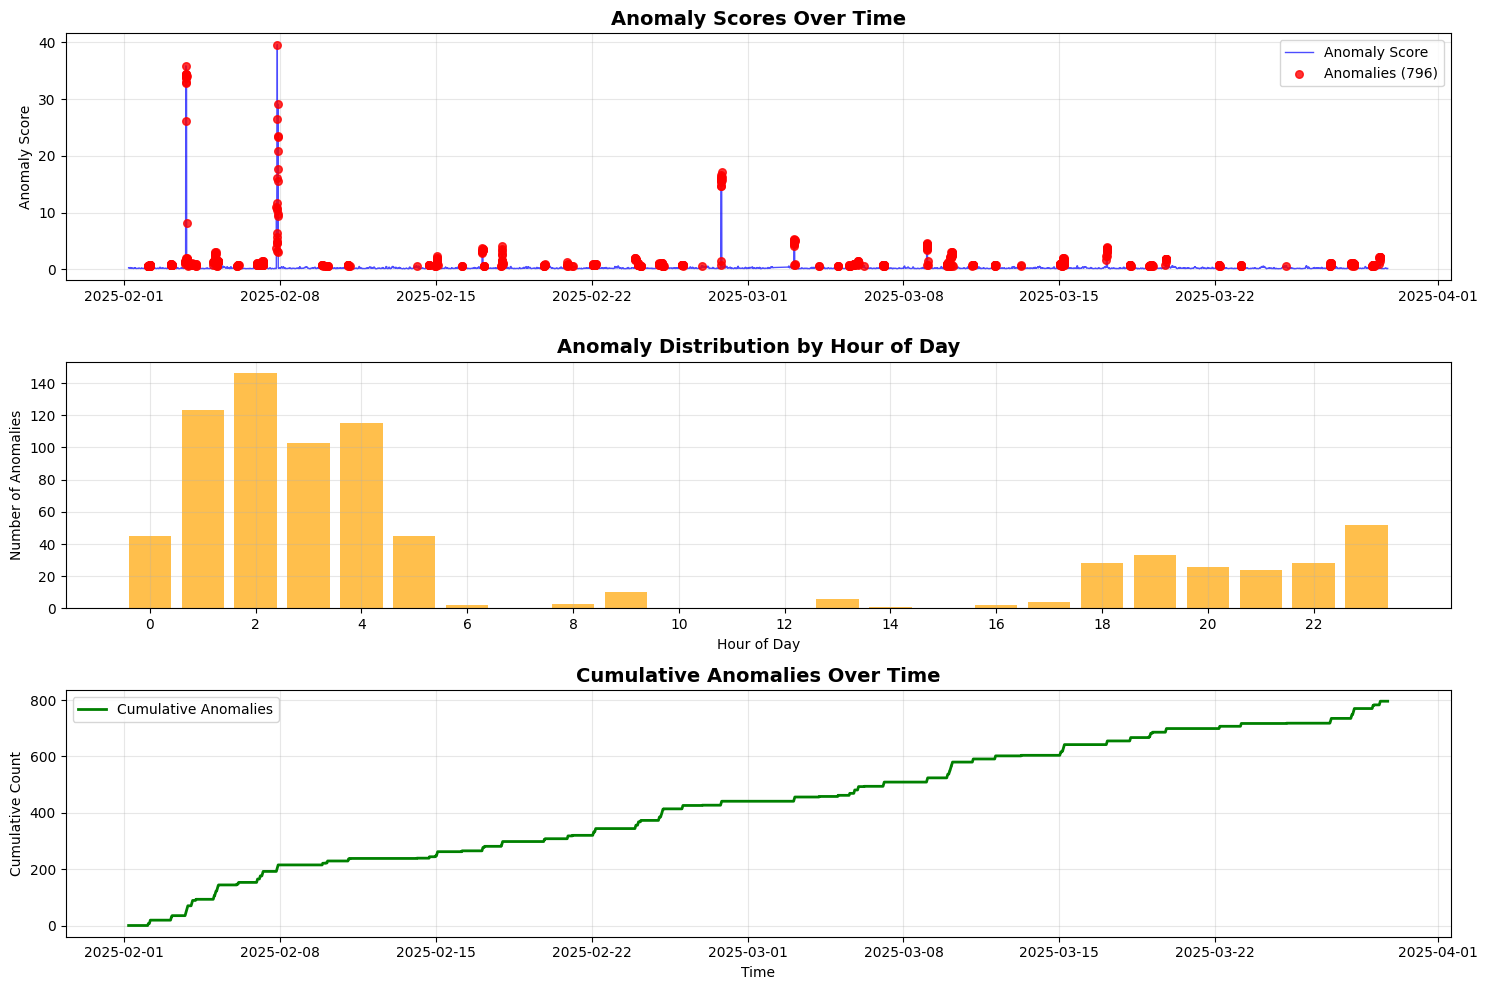

📊 Creating anomaly statistics...
📊 Anomaly statistics plot saved to anomaly_statistics.png


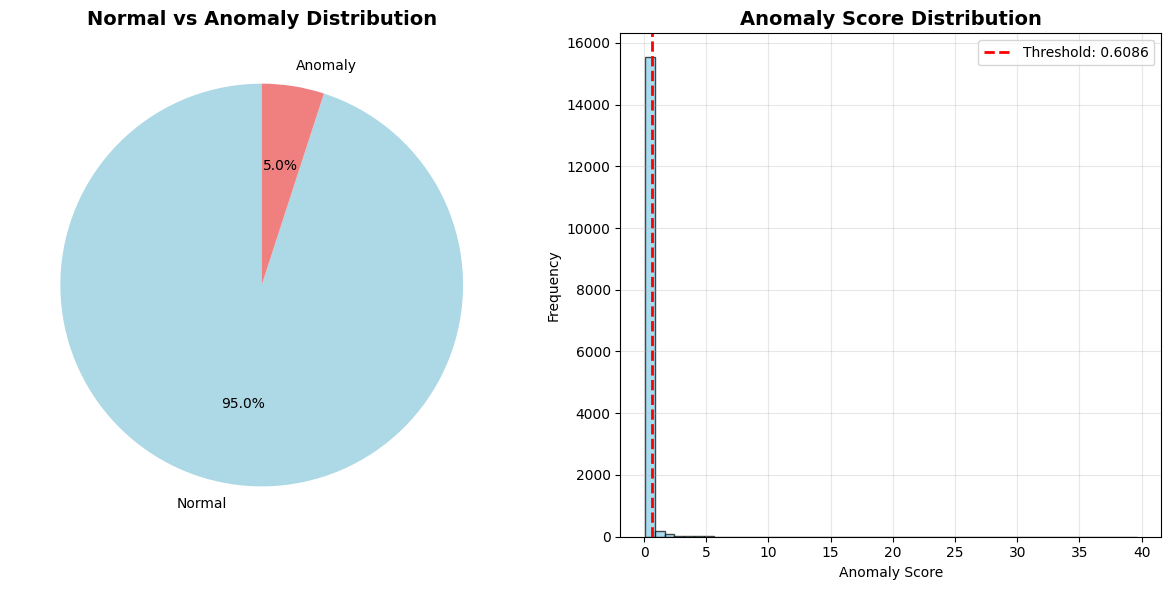

📈 Creating detailed analysis...
🏆 Top anomalies plot saved to top_anomalies.png


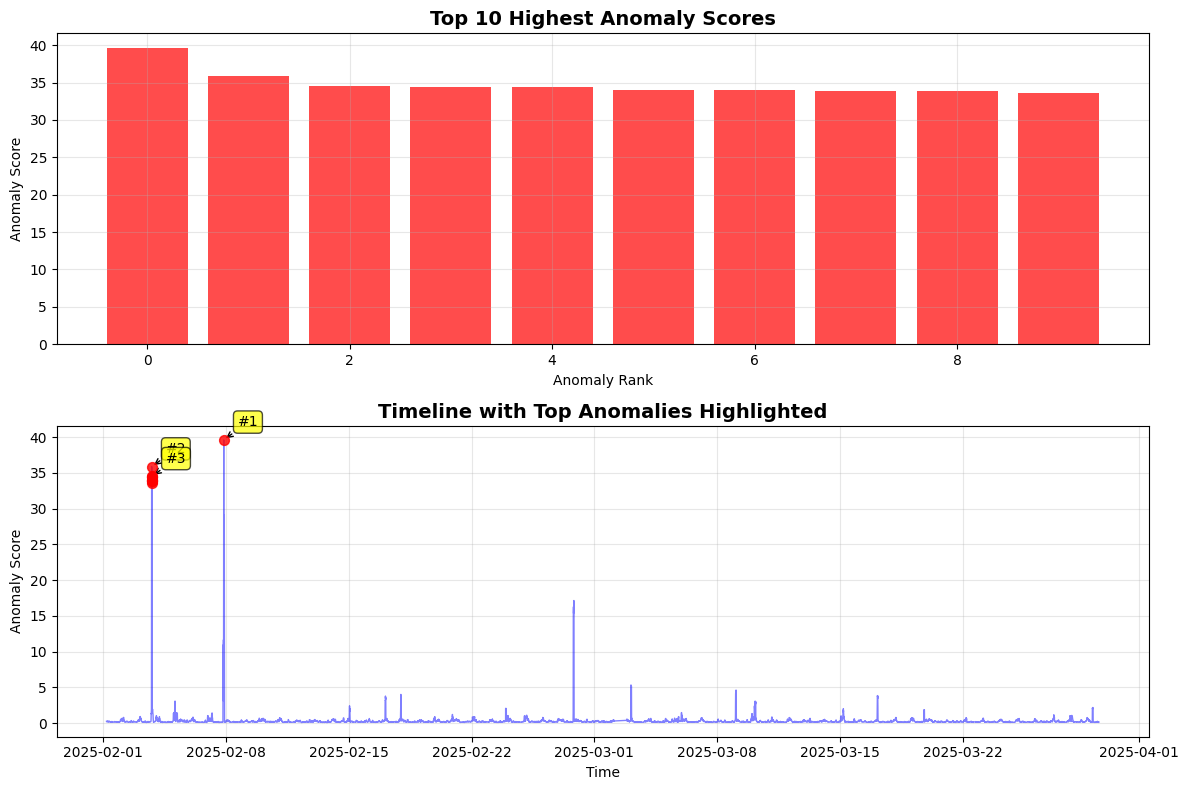


🏆 TOP 10 ANOMALIES:
1. Time: 2025-02-07 21:15:00, Score: 39.596405
2. Time: 2025-02-03 18:45:00, Score: 35.845692
3. Time: 2025-02-03 19:00:00, Score: 34.491489
4. Time: 2025-02-03 18:50:00, Score: 34.435429
5. Time: 2025-02-03 19:15:00, Score: 34.419804
6. Time: 2025-02-03 19:20:00, Score: 34.014027
7. Time: 2025-02-03 19:25:00, Score: 33.995415
8. Time: 2025-02-03 18:55:00, Score: 33.919308
9. Time: 2025-02-03 19:05:00, Score: 33.868088
10. Time: 2025-02-03 19:10:00, Score: 33.614258
🔥 Anomaly heatmap saved to anomaly_heatmap.png


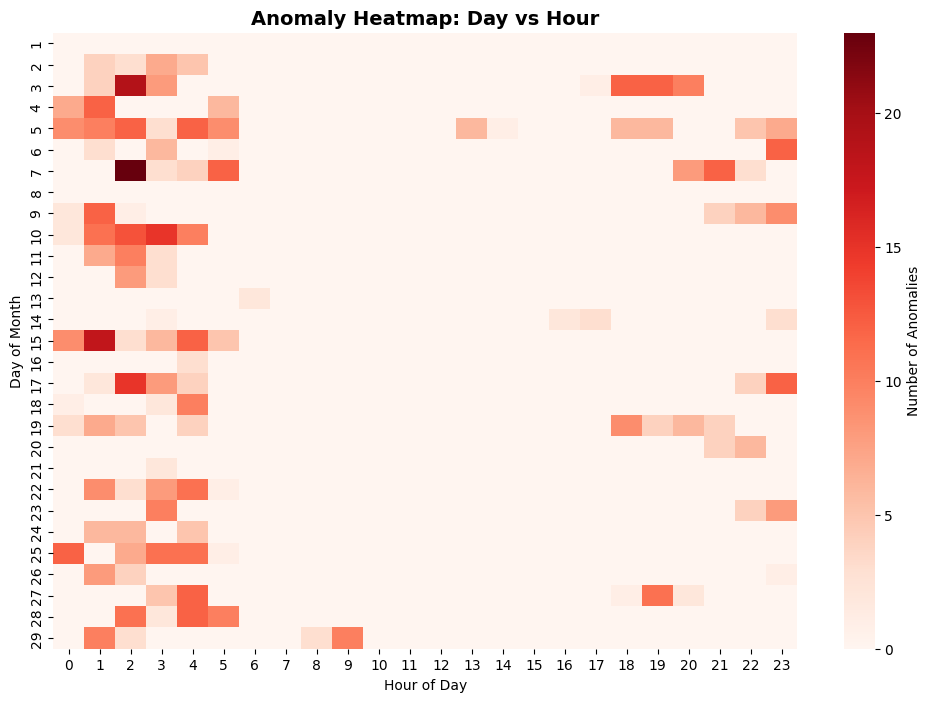


🎉 VISUALIZATION COMPLETED!
💾 All plots saved as PNG files with 300 DPI quality

📝 HƯỚNG DẪN SỬ DỤNG:
1. 🎯 Interactive mode:
   results_df = run_visualization()

2. 🎯 Direct mode:
   results_df = main_visualization('your_file.xlsx')

3. 💾 Save functions:
   save_results_simple(results)
   save_with_original_data(results, 'data.csv')

4. 🎨 Generated files (nếu chọn save):
   📊 anomaly_overview.png
   📊 anomaly_statistics.png
   🔮 prediction_analysis.png
   🏆 top_anomalies.png
   🔥 anomaly_heatmap.png


In [4]:
# Enhanced Script để visualize anomaly detection results từ file Excel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style cho plots
plt.style.use('default')
sns.set_palette("husl")

def get_visualization_preferences():
    """
    Hỏi ý kiến người dùng về visualization options
    """
    print("\n🎨 TÙY CHỌN VISUALIZATION")
    print("="*50)

    preferences = {}

    # Hỏi về plotting
    while True:
        show_plots = input("📊 Bạn có muốn hiển thị các biểu đồ không? (y/n): ").lower().strip()
        if show_plots in ['y', 'yes', 'n', 'no']:
            preferences['show_plots'] = show_plots in ['y', 'yes']
            break
        print("❌ Vui lòng nhập 'y' hoặc 'n'")

    # Hỏi về save plots
    while True:
        save_plots = input("💾 Bạn có muốn lưu các biểu đồ ra file ảnh không? (y/n): ").lower().strip()
        if save_plots in ['y', 'yes', 'n', 'no']:
            preferences['save_plots'] = save_plots in ['y', 'yes']
            break
        print("❌ Vui lòng nhập 'y' hoặc 'n'")

    # Hỏi về prediction plots (nếu có prediction data)
    while True:
        plot_predictions = input("🔮 Bạn có muốn plot đồ thị dự đoán (predictions) không? (y/n): ").lower().strip()
        if plot_predictions in ['y', 'yes', 'n', 'no']:
            preferences['plot_predictions'] = plot_predictions in ['y', 'yes']
            break
        print("❌ Vui lòng nhập 'y' hoặc 'n'")

    # Hỏi về detailed analysis
    while True:
        detailed_analysis = input("📈 Bạn có muốn phân tích chi tiết (heatmap, top anomalies) không? (y/n): ").lower().strip()
        if detailed_analysis in ['y', 'yes', 'n', 'no']:
            preferences['detailed_analysis'] = detailed_analysis in ['y', 'yes']
            break
        print("❌ Vui lòng nhập 'y' hoặc 'n'")

    # Hiển thị tóm tắt
    print("\n✅ TÓM TẮT LỰA CHỌN:")
    print(f"📊 Show plots: {'Có' if preferences['show_plots'] else 'Không'}")
    print(f"💾 Save plots: {'Có' if preferences['save_plots'] else 'Không'}")
    print(f"🔮 Plot predictions: {'Có' if preferences['plot_predictions'] else 'Không'}")
    print(f"📈 Detailed analysis: {'Có' if preferences['detailed_analysis'] else 'Không'}")

    return preferences

def load_results_from_excel(excel_file_path):
    """
    Load kết quả anomaly detection từ file Excel
    """
    try:
        # Đọc file Excel
        results_df = pd.read_excel(excel_file_path)
        print(f"✅ Loaded {len(results_df)} records from {excel_file_path}")
        print(f"📋 Columns: {results_df.columns.tolist()}")
        return results_df
    except Exception as e:
        print(f"❌ Error loading Excel file: {e}")
        return None

def load_prediction_data(excel_file_path):
    """
    Load prediction data nếu có trong Excel file
    """
    try:
        # Thử đọc sheet predictions nếu có
        with pd.ExcelFile(excel_file_path) as xls:
            sheet_names = xls.sheet_names
            print(f"📋 Available sheets: {sheet_names}")

            prediction_data = None
            if 'Predictions' in sheet_names:
                prediction_data = pd.read_excel(excel_file_path, sheet_name='Predictions')
                print(f"✅ Loaded prediction data: {prediction_data.shape}")
            else:
                print("⚠️ No prediction data found in Excel file")

            return prediction_data
    except Exception as e:
        print(f"❌ Error loading prediction data: {e}")
        return None

def create_time_index(results_df, start_date='2025-01-01', freq='5min'):
    """
    Tạo time index cho dữ liệu nếu chưa có timestamp
    """
    if 'timestamp' in results_df.columns:
        # Nếu có timestamp column nhưng là số thứ tự
        if results_df['timestamp'].dtype in ['int64', 'float64']:
            # Tạo datetime index từ start_date
            time_index = pd.date_range(start=start_date,
                                     periods=len(results_df),
                                     freq=freq)
            results_df['datetime'] = time_index
        else:
            # Nếu timestamp đã là datetime
            results_df['datetime'] = pd.to_datetime(results_df['timestamp'])
    else:
        # Tạo datetime index mới
        time_index = pd.date_range(start=start_date,
                                 periods=len(results_df),
                                 freq=freq)
        results_df['datetime'] = time_index

    return results_df

def plot_anomaly_overview(results_df, show_plot=True, save_plot=False, filename='anomaly_overview.png', figsize=(15, 10)):
    """
    Plot tổng quan về anomalies theo thời gian với save option
    """
    fig, axes = plt.subplots(3, 1, figsize=figsize)

    # Plot 1: Anomaly scores theo thời gian
    axes[0].plot(results_df['datetime'], results_df['anomaly_score'],
                 color='blue', alpha=0.7, linewidth=1, label='Anomaly Score')

    # Highlight anomalies
    anomaly_points = results_df[results_df['is_anomaly'] == True]
    if len(anomaly_points) > 0:
        axes[0].scatter(anomaly_points['datetime'], anomaly_points['anomaly_score'],
                       color='red', s=30, alpha=0.8, label=f'Anomalies ({len(anomaly_points)})', zorder=5)

    axes[0].set_title('Anomaly Scores Over Time', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Anomaly Score')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Plot 2: Anomaly distribution by hour
    if len(anomaly_points) > 0:
        anomaly_hours = anomaly_points['datetime'].dt.hour.value_counts().sort_index()
        axes[1].bar(anomaly_hours.index, anomaly_hours.values, color='orange', alpha=0.7)
        axes[1].set_title('Anomaly Distribution by Hour of Day', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Hour of Day')
        axes[1].set_ylabel('Number of Anomalies')
        axes[1].set_xticks(range(0, 24, 2))
        axes[1].grid(True, alpha=0.3)
    else:
        axes[1].text(0.5, 0.5, 'No anomalies detected', transform=axes[1].transAxes,
                    ha='center', va='center', fontsize=12)
        axes[1].set_title('Anomaly Distribution by Hour of Day', fontsize=14, fontweight='bold')

    # Plot 3: Cumulative anomalies
    results_df['cumulative_anomalies'] = results_df['is_anomaly'].cumsum()
    axes[2].plot(results_df['datetime'], results_df['cumulative_anomalies'],
                 color='green', linewidth=2, label='Cumulative Anomalies')
    axes[2].set_title('Cumulative Anomalies Over Time', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Time')
    axes[2].set_ylabel('Cumulative Count')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()

    # Save if requested
    if save_plot:
        try:
            plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
            print(f"📊 Anomaly overview plot saved to {filename}")
        except Exception as e:
            print(f"❌ Error saving plot: {e}")

    # Show if requested
    if show_plot:
        plt.show()
    else:
        plt.close()

def plot_prediction_analysis(prediction_data, results_df, show_plot=True, save_plot=False, filename='prediction_analysis.png', figsize=(15, 12)):
    """
    Plot phân tích predictions vs actuals
    """
    if prediction_data is None:
        print("⚠️ No prediction data available for plotting")
        return

    fig, axes = plt.subplots(4, 1, figsize=figsize)

    # Tạo time index cho prediction data
    time_index = pd.date_range(start='2025-01-01', periods=len(prediction_data), freq='5min')

    # Plot 1: Predictions vs Actuals (first feature)
    if 'predicted_0' in prediction_data.columns and 'actual_0' in prediction_data.columns:
        axes[0].plot(time_index, prediction_data['predicted_0'], label='Predicted', alpha=0.8, linewidth=1.5)
        axes[0].plot(time_index, prediction_data['actual_0'], label='Actual', alpha=0.8, linewidth=1.5)
        axes[0].set_title('Predictions vs Actuals (Feature 1)', fontsize=14, fontweight='bold')
        axes[0].set_ylabel('Value')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

    # Plot 2: Prediction Error
    if 'predicted_0' in prediction_data.columns and 'actual_0' in prediction_data.columns:
        error = prediction_data['actual_0'] - prediction_data['predicted_0']
        axes[1].plot(time_index, error, color='red', alpha=0.7, linewidth=1)
        axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
        axes[1].set_title('Prediction Error (Actual - Predicted)', fontsize=14, fontweight='bold')
        axes[1].set_ylabel('Error')
        axes[1].grid(True, alpha=0.3)

    # Plot 3: Error Distribution
    if 'predicted_0' in prediction_data.columns and 'actual_0' in prediction_data.columns:
        error = prediction_data['actual_0'] - prediction_data['predicted_0']
        axes[2].hist(error, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[2].axvline(x=error.mean(), color='red', linestyle='--', label=f'Mean: {error.mean():.4f}')
        axes[2].axvline(x=error.median(), color='green', linestyle='--', label=f'Median: {error.median():.4f}')
        axes[2].set_title('Prediction Error Distribution', fontsize=14, fontweight='bold')
        axes[2].set_xlabel('Error')
        axes[2].set_ylabel('Frequency')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)

    # Plot 4: Correlation with Anomaly Scores
    if len(results_df) == len(prediction_data):
        if 'predicted_0' in prediction_data.columns and 'actual_0' in prediction_data.columns:
            error = abs(prediction_data['actual_0'] - prediction_data['predicted_0'])
            axes[3].scatter(error, results_df['anomaly_score'], alpha=0.6, s=20)
            axes[3].set_title('Prediction Error vs Anomaly Score', fontsize=14, fontweight='bold')
            axes[3].set_xlabel('Absolute Prediction Error')
            axes[3].set_ylabel('Anomaly Score')
            axes[3].grid(True, alpha=0.3)

            # Correlation coefficient
            corr = np.corrcoef(error, results_df['anomaly_score'])[0, 1]
            axes[3].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[3].transAxes,
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()

    # Save if requested
    if save_plot:
        try:
            plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
            print(f"🔮 Prediction analysis plot saved to {filename}")
        except Exception as e:
            print(f"❌ Error saving plot: {e}")

    # Show if requested
    if show_plot:
        plt.show()
    else:
        plt.close()

def plot_anomaly_heatmap(results_df, show_plot=True, save_plot=False, filename='anomaly_heatmap.png', figsize=(12, 8)):
    """
    Tạo heatmap anomalies theo ngày và giờ với save option
    """
    if len(results_df[results_df['is_anomaly'] == True]) == 0:
        print("⚠️ No anomalies found to create heatmap")
        return

    # Tạo pivot table
    results_df['hour'] = results_df['datetime'].dt.hour
    results_df['day'] = results_df['datetime'].dt.day

    # Tính số anomalies cho mỗi (day, hour)
    anomaly_matrix = results_df.groupby(['day', 'hour'])['is_anomaly'].sum().unstack(fill_value=0)

    plt.figure(figsize=figsize)
    sns.heatmap(anomaly_matrix, cmap='Reds', annot=False, cbar_kws={'label': 'Number of Anomalies'})
    plt.title('Anomaly Heatmap: Day vs Hour', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Month')

    # Save if requested
    if save_plot:
        try:
            plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
            print(f"🔥 Anomaly heatmap saved to {filename}")
        except Exception as e:
            print(f"❌ Error saving plot: {e}")

    # Show if requested
    if show_plot:
        plt.show()
    else:
        plt.close()

def plot_anomaly_statistics(results_df, show_plot=True, save_plot=False, filename='anomaly_statistics.png', figsize=(12, 6)):
    """
    Plot thống kê về anomalies với save option
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Pie chart: Normal vs Anomaly
    anomaly_counts = results_df['is_anomaly'].value_counts()
    labels = ['Normal', 'Anomaly']
    colors = ['lightblue', 'lightcoral']

    axes[0].pie(anomaly_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[0].set_title('Normal vs Anomaly Distribution', fontsize=14, fontweight='bold')

    # Histogram: Anomaly scores distribution
    axes[1].hist(results_df['anomaly_score'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')

    # Highlight threshold nếu có
    if len(results_df[results_df['is_anomaly'] == True]) > 0:
        threshold = results_df[results_df['is_anomaly'] == True]['anomaly_score'].min()
        axes[1].axvline(x=threshold, color='red', linestyle='--', linewidth=2,
                       label=f'Threshold: {threshold:.4f}')
        axes[1].legend()

    axes[1].set_title('Anomaly Score Distribution', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Anomaly Score')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()

    # Save if requested
    if save_plot:
        try:
            plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
            print(f"📊 Anomaly statistics plot saved to {filename}")
        except Exception as e:
            print(f"❌ Error saving plot: {e}")

    # Show if requested
    if show_plot:
        plt.show()
    else:
        plt.close()

def plot_top_anomalies(results_df, top_n=10, show_plot=True, save_plot=False, filename='top_anomalies.png', figsize=(12, 8)):
    """
    Plot top N anomalies với scores cao nhất với save option
    """
    anomalies = results_df[results_df['is_anomaly'] == True].nlargest(top_n, 'anomaly_score')

    if len(anomalies) == 0:
        print("⚠️ No anomalies found")
        return

    fig, axes = plt.subplots(2, 1, figsize=figsize)

    # Top anomalies bar chart
    axes[0].bar(range(len(anomalies)), anomalies['anomaly_score'], color='red', alpha=0.7)
    axes[0].set_title(f'Top {len(anomalies)} Highest Anomaly Scores', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Anomaly Rank')
    axes[0].set_ylabel('Anomaly Score')
    axes[0].grid(True, alpha=0.3)

    # Timeline với top anomalies highlighted
    axes[1].plot(results_df['datetime'], results_df['anomaly_score'],
                 color='blue', alpha=0.5, linewidth=1)
    axes[1].scatter(anomalies['datetime'], anomalies['anomaly_score'],
                   color='red', s=50, alpha=0.8, zorder=5)

    # Annotate top 3 anomalies
    for i, (idx, row) in enumerate(anomalies.head(3).iterrows()):
        axes[1].annotate(f'#{i+1}',
                        xy=(row['datetime'], row['anomaly_score']),
                        xytext=(10, 10), textcoords='offset points',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

    axes[1].set_title('Timeline with Top Anomalies Highlighted', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Anomaly Score')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()

    # Save if requested
    if save_plot:
        try:
            plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
            print(f"🏆 Top anomalies plot saved to {filename}")
        except Exception as e:
            print(f"❌ Error saving plot: {e}")

    # Show if requested
    if show_plot:
        plt.show()
    else:
        plt.close()

    # Print top anomalies info
    print(f"\n🏆 TOP {len(anomalies)} ANOMALIES:")
    print("="*50)
    for i, (idx, row) in enumerate(anomalies.iterrows()):
        print(f"{i+1}. Time: {row['datetime']}, Score: {row['anomaly_score']:.6f}")

def generate_anomaly_report(results_df):
    """
    Tạo báo cáo tổng hợp về anomalies
    """
    total_records = len(results_df)
    total_anomalies = results_df['is_anomaly'].sum()
    anomaly_rate = (total_anomalies / total_records) * 100

    if total_anomalies > 0:
        avg_anomaly_score = results_df[results_df['is_anomaly'] == True]['anomaly_score'].mean()
        max_anomaly_score = results_df['anomaly_score'].max()
        min_anomaly_score = results_df[results_df['is_anomaly'] == True]['anomaly_score'].min()

        # Time analysis
        anomaly_data = results_df[results_df['is_anomaly'] == True]
        most_common_hour = anomaly_data['datetime'].dt.hour.mode().iloc[0] if len(anomaly_data) > 0 else "N/A"

        # Duration analysis
        time_span = results_df['datetime'].max() - results_df['datetime'].min()
    else:
        avg_anomaly_score = max_anomaly_score = min_anomaly_score = 0
        most_common_hour = "N/A"
        time_span = results_df['datetime'].max() - results_df['datetime'].min()

    print("="*60)
    print("📊 ANOMALY DETECTION REPORT")
    print("="*60)
    print(f"📊 Total Records: {total_records:,}")
    print(f"🚨 Total Anomalies: {total_anomalies:,}")
    print(f"📈 Anomaly Rate: {anomaly_rate:.2f}%")
    print(f"⏱️  Data Time Span: {time_span}")
    print()
    print("ANOMALY STATISTICS:")
    print("-" * 30)
    if total_anomalies > 0:
        print(f"Average Anomaly Score: {avg_anomaly_score:.6f}")
        print(f"Maximum Anomaly Score: {max_anomaly_score:.6f}")
        print(f"Minimum Anomaly Score: {min_anomaly_score:.6f}")
        print(f"Most Common Hour for Anomalies: {most_common_hour}:00")
    else:
        print("No anomalies detected in the dataset")
    print("="*60)

def main_visualization(excel_file_path):
    """
    Hàm chính để chạy tất cả visualizations với user preferences
    """
    print("🎨 ANOMALY DETECTION VISUALIZATION")
    print("="*60)

    # Get user preferences
    preferences = get_visualization_preferences()

    # Load dữ liệu
    print(f"\n📖 Loading results from Excel file...")
    results_df = load_results_from_excel(excel_file_path)

    if results_df is None:
        return None

    # Load prediction data nếu có
    prediction_data = None
    if preferences['plot_predictions']:
        print(f"\n🔮 Loading prediction data...")
        prediction_data = load_prediction_data(excel_file_path)

    # Tạo time index
    results_df = create_time_index(results_df)

    # Generate report
    print(f"\n📊 GENERATING REPORT...")
    generate_anomaly_report(results_df)

    # Tạo các plots theo preferences
    print(f"\n🎨 GENERATING VISUALIZATIONS...")

    # 1. Overview plots (always generate)
    print("📊 Creating anomaly overview...")
    plot_anomaly_overview(results_df,
                         show_plot=preferences['show_plots'],
                         save_plot=preferences['save_plots'],
                         filename='anomaly_overview.png')

    # 2. Statistics
    print("📊 Creating anomaly statistics...")
    plot_anomaly_statistics(results_df,
                           show_plot=preferences['show_plots'],
                           save_plot=preferences['save_plots'],
                           filename='anomaly_statistics.png')

    # 3. Prediction analysis (nếu có data và user muốn)
    if preferences['plot_predictions'] and prediction_data is not None:
        print("🔮 Creating prediction analysis...")
        plot_prediction_analysis(prediction_data, results_df,
                                show_plot=preferences['show_plots'],
                                save_plot=preferences['save_plots'],
                                filename='prediction_analysis.png')

    # 4. Detailed analysis (nếu user muốn)
    if preferences['detailed_analysis']:
        print("📈 Creating detailed analysis...")

        # Top anomalies
        plot_top_anomalies(results_df, top_n=10,
                          show_plot=preferences['show_plots'],
                          save_plot=preferences['save_plots'],
                          filename='top_anomalies.png')

        # Heatmap (nếu có anomalies)
        if results_df['is_anomaly'].sum() > 0:
            plot_anomaly_heatmap(results_df,
                                show_plot=preferences['show_plots'],
                                save_plot=preferences['save_plots'],
                                filename='anomaly_heatmap.png')

    print(f"\n🎉 VISUALIZATION COMPLETED!")
    if preferences['save_plots']:
        print(f"💾 All plots saved as PNG files with 300 DPI quality")

    return results_df

# ==================== USAGE EXAMPLES ====================
def run_visualization():
    """
    Function để chạy visualization với user input
    """
    # Hỏi file path
    print("📁 EXCEL FILE INPUT")
    print("="*50)
    excel_file_path = input("📝 Nhập tên file Excel (ví dụ: telecom_anomaly_results.xlsx): ").strip()

    if not excel_file_path:
        excel_file_path = 'telecom_anomaly_results.xlsx'  # Default
        print(f"📝 Using default file: {excel_file_path}")

    # Chạy visualization
    results_df = main_visualization(excel_file_path)

    return results_df

# Cách sử dụng:
if __name__ == "__main__":
    # Interactive mode
      results_df = run_visualization()

    # Hoặc direct mode với file path
    results_df = main_visualization('telecom_anomaly_results.xlsx')

# ==================== SAVE RESULTS FUNCTIONS (giữ nguyên) ====================
def save_results_to_excel(results, original_df=None, output_file='telecom_anomaly_results.xlsx'):
    """
    Script riêng để save results sang Excel
    """
    try:
        # Tạo DataFrame với kết quả
        n_results = len(results['anomaly_scores'])

        # Tạo time index
        if original_df is not None and len(original_df) >= n_results:
            start_idx = len(original_df) - n_results
            time_data = original_df.iloc[start_idx:start_idx + n_results]['date'].reset_index(drop=True)
        else:
            print("⚠️ Original dataframe not provided or insufficient data. Creating synthetic timestamps.")
            time_data = pd.date_range(start='2025-01-01', periods=n_results, freq='5min')

        results_df = pd.DataFrame({
            'timestamp': time_data,
            'anomaly_score': results['anomaly_scores'],
            'is_anomaly': results['anomalies'].astype(bool),
            'threshold_used': results['threshold']
        })

        # Thêm thống kê
        results_df['anomaly_rank'] = results_df['anomaly_score'].rank(ascending=False)

        # Lưu ra Excel với multiple sheets
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            # Sheet 1: Main results
            results_df.to_excel(writer, sheet_name='Anomaly_Results', index=False)

            # Sheet 2: Summary statistics
            summary_stats = pd.DataFrame({
                'Metric': ['Total Records', 'Total Anomalies', 'Anomaly Rate (%)',
                          'Avg Anomaly Score', 'Max Anomaly Score', 'Threshold'],
                'Value': [
                    len(results_df),
                    results_df['is_anomaly'].sum(),
                    (results_df['is_anomaly'].sum() / len(results_df)) * 100,
                    results_df[results_df['is_anomaly']]['anomaly_score'].mean() if results_df['is_anomaly'].any() else 0,
                    results_df['anomaly_score'].max(),
                    results['threshold']
                ]
            })
            summary_stats.to_excel(writer, sheet_name='Summary', index=False)

            # Sheet 3: Top anomalies
            if results_df['is_anomaly'].any():
                top_anomalies = results_df[results_df['is_anomaly']].nlargest(20, 'anomaly_score')
                top_anomalies.to_excel(writer, sheet_name='Top_Anomalies', index=False)

            # Sheet 4: Predictions (nếu có)
            if 'predictions' in results and 'actuals' in results:
                # Flatten predictions và actuals để lưu
                predictions_flat = results['predictions'].reshape(-1, results['predictions'].shape[-1])
                actuals_flat = results['actuals'].reshape(-1, results['actuals'].shape[-1])

                # Tạo DataFrame cho predictions
                pred_columns = [f'predicted_{i}' for i in range(predictions_flat.shape[1])]
                actual_columns = [f'actual_{i}' for i in range(actuals_flat.shape[1])]

                pred_df = pd.DataFrame(predictions_flat, columns=pred_columns)
                actual_df = pd.DataFrame(actuals_flat, columns=actual_columns)

                # Combine predictions và actuals
                combined_pred_df = pd.concat([pred_df, actual_df], axis=1)
                combined_pred_df.to_excel(writer, sheet_name='Predictions', index=False)

        print(f"✅ Results saved successfully to {output_file}")
        print(f"📊 Total records: {len(results_df)}")
        print(f"🚨 Anomalies detected: {results_df['is_anomaly'].sum()}")
        print(f"📈 Anomaly rate: {(results_df['is_anomaly'].sum() / len(results_df)) * 100:.2f}%")

        return results_df

    except Exception as e:
        print(f"❌ Error saving results: {e}")
        return None

def save_results_simple(results, output_file='telecom_anomaly_results.xlsx'):
    """
    Simplified save function - chỉ cần results object
    """
    return save_results_to_excel(results, original_df=None, output_file=output_file)

def save_with_original_data(results, csv_file='data_hl19.csv', output_file='telecom_anomaly_results.xlsx'):
    """
    Load lại original data để có timestamps chính xác
    """
    try:
        # Load original data
        original_df = pd.read_csv(csv_file)
        original_df.columns = original_df.columns.str.strip()
        original_df['date'] = pd.to_datetime(original_df['date'])
        original_df = original_df.sort_values('date').reset_index(drop=True)

        # Save với timestamps chính xác
        return save_results_to_excel(results, original_df, output_file)
    except Exception as e:
        print(f"❌ Could not load original data: {e}")
        print("🔄 Using simplified save instead...")
        return save_results_simple(results, output_file)

# ==================== SUMMARY FUNCTIONS ====================
def print_usage_summary():
    """
    In ra hướng dẫn sử dụng
    """
    print("\n📝 HƯỚNG DẪN SỬ DỤNG:")
    print("="*50)
    print("1. 🎯 Interactive mode:")
    print("   results_df = run_visualization()")
    print()
    print("2. 🎯 Direct mode:")
    print("   results_df = main_visualization('your_file.xlsx')")
    print()
    print("3. 💾 Save functions:")
    print("   save_results_simple(results)")
    print("   save_with_original_data(results, 'data.csv')")
    print()
    print("4. 🎨 Generated files (nếu chọn save):")
    print("   📊 anomaly_overview.png")
    print("   📊 anomaly_statistics.png")
    print("   🔮 prediction_analysis.png")
    print("   🏆 top_anomalies.png")
    print("   🔥 anomaly_heatmap.png")
    print("="*50)

# In hướng dẫn khi import
print_usage_summary()

In [5]:
from google.colab import files

files.download('telecom_anomaly_results.xlsx')
files.download('informer_telecom_anomaly_model.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>